# Exploratory Data Analysis

With our data now cleaned I can begin to explore the home run data to identify relationships and trends that can help explain what is contributing to a batters home run exit velocity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('fivethirtyeight')

### Load the Data

Loading in each of our cleaned datasets:
- StatCast home run pitch data
- Baseball samples from 2015, 2016 and 2017
- Batter personal stats (Height, Weight, Age)

In [2]:
hr_df = pd.read_csv('../data/final_clean_hr.csv')
baseballs_df = pd.read_csv('../data/final_mlb_baseballs.csv')
batters_df = pd.read_csv('../data/final_clean_player_info.csv')

In [3]:
hr_df.drop('Unnamed: 0', axis=1, inplace=True)
baseballs_df.drop('Unnamed: 0', axis=1, inplace=True)
batters_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
hr_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,...,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y
0,CH,2017-06-10,84.5,-3.4020,6.4696,Aaron Judge,592450,501957,4.0,R,...,-14.0814,3.8260,1.6672,382.0,121.1,24.626,84.120,1682.0,6.342,54.1561
1,FF,2017-04-28,97.1,-2.8091,5.9279,Aaron Judge,592450,592332,5.0,R,...,-11.0144,3.9900,1.8400,435.0,119.4,16.541,96.019,2335.0,6.043,54.4549
2,CU,2015-06-23,86.7,-1.5647,5.3406,Giancarlo Stanton,519317,593372,7.0,R,...,-33.2860,3.7900,1.7200,479.0,119.2,21.970,84.343,2145.0,5.035,55.4629
3,SL,2017-09-28,89.5,2.0682,6.1177,Giancarlo Stanton,519317,571521,8.0,L,...,-34.1660,3.6318,1.6020,467.0,118.7,22.736,88.690,2173.0,5.433,55.0652
4,SL,2017-06-11,84.7,-1.9795,5.6860,Aaron Judge,592450,548337,5.0,R,...,-24.6262,3.8264,1.6676,495.0,118.6,28.419,84.757,2183.0,6.153,54.3442


In [5]:
baseballs_df.head()

,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds,year
0,5.120125,9.107917,0.040502,0.491333,12740.875,2015
1,5.122500,9.079000,0.038432,0.494100,12926.400,2016
2,5.104863,9.080000,0.038000,0.476463,12926.000,2017


In [6]:
batters_df.head()

,batter_id,height,weight,age
0,592450,79,282,26
1,519317,78,245,28
2,471865,73,220,32
3,443558,74,230,38
4,121347,75,230,43


#### Merge the Dataframes

In order to work with this data together I'll merge the data into one dataframe.

In [7]:
final_df = pd.merge(hr_df, batters_df, how='left', left_on='batter', right_on='batter_id')

In [8]:
final_df[final_df['batter_id'].isnull()]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,...,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,release_pos_y,batter_id,height,weight,age


In [9]:
final_df = pd.merge(final_df, baseballs_df, how='left', left_on='game_year', right_on='year')

In [10]:
final_df.isnull().sum().sum()

0

In [11]:
final_df.drop_duplicates(inplace=True)

In [12]:
final_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,zone,p_throws,...,batter_id,height,weight,age,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds,year
0,CH,2017-06-10,84.5,-3.4020,6.4696,Aaron Judge,592450,501957,4.0,R,...,592450,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000,2017
1,FF,2017-04-28,97.1,-2.8091,5.9279,Aaron Judge,592450,592332,5.0,R,...,592450,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000,2017
2,CU,2015-06-23,86.7,-1.5647,5.3406,Giancarlo Stanton,519317,593372,7.0,R,...,519317,78,245,28,5.120125,9.107917,0.040502,0.491333,12740.875,2015
3,SL,2017-09-28,89.5,2.0682,6.1177,Giancarlo Stanton,519317,571521,8.0,L,...,519317,78,245,28,5.104863,9.080000,0.038000,0.476463,12926.000,2017
4,SL,2017-06-11,84.7,-1.9795,5.6860,Aaron Judge,592450,548337,5.0,R,...,592450,79,282,26,5.104863,9.080000,0.038000,0.476463,12926.000,2017


#### Final Dataframe Updates

With all of my data now merged into one frame I want to make some final changes:
- Drop Columns:
    - `batter`  : This column is the batter id which I used to the merge the dataframes. I already have the batter names so I will work with that column moving forward
    - `pitcher` : This column is the pitcher id. I am focused on the batter specifically and I also have all of the specific statistics about each of the pitches thrown so this is not needed
    - `game_date` : I have the game year (or season) to analyze and will not need game date
    - `batter_id` : This column was used to merge the batters personal stats in with the home run data and was added through that process and is not needed
    - `year` : This columns was used to merge the baseball stats in with the home run data and was added through that process and is not needed

In [13]:
col = [
    'batter',
    'pitcher',
    'game_date',
    'batter_id',
    'year'
]
final_df.drop(col, axis=1, inplace=True)

### Explore the data

Final features (Data Dictionary):

**NOTE:** For more detail about each of the statistics you can visit the following websites:
    - https://baseballsavant.mlb.com/
    - https://fivethirtyeight.com/features/juiced-baseballs/
    - https://www.theringer.com/2017/6/14/16044264/2017-mlb-home-run-spike-juiced-ball-testing-reveal-155cd21108bc

- **Pitch Features**
    - `pitch_type`: The type of pitch that was thrown and hit for a home run
        - `CH : Changeup`
        - `CU : Curveball`
        - `EP : Eephus`
        - `FC : Cut Fastball (Cutter)`
        - `FF : Four-seam Fastball`
        - `FO : Pitch Out`
        - `FS : Sinking Fastball / Split-Fingered (Splitter)`
        - `FT : Two-seam Fastball`
        - `KC : Knuckle-curve`
        - `KN : Knuckleball`
        - `SC : Screwball`
        - `SI : Sinker`
        - `SL : Slider`
    - `p_throws`: the strong hand in which the pitcher threw the pitch
    - `pfx_x`: the horizontal movement, in inches, of the pitch between the release point and home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement. This parameter is measured at y=40 feet regardless of the y0 value.
    - `pfx_z`: the vertical movement, in inches, of the pitch between the release point and home plate, as compared to a theoretical pitch thrown at the same speed with no spin-induced movement. This parameter is measured at y=40 feet regardless of the y0 value.
    - `vx0`: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
    - `vy0`: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
    - `vz0`: the velocity of the pitch, in feet per second, in three dimensions, measured at the initial point.
    - `ax`: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
    - `ay`: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
    - `az`: the acceleration of the pitch, in feet per second per second, in three dimensions, measured at the initial point.
    - `effective_speed`: the (actual) speed of the pitch upon the ball crossing home plate
    - `release_speed`: the (perceived) speed of the pitch upon release from the pitcher
    - `release_spin_rate`: how much spin, in revolutions per minute, a pitch was thrown with upon release.
    - `release_extension`: how far off the mound, in feet, a pitcher releases the pitch.
    - `release_pos_y`: the release coordinates in three dimensions, measure at the initial release point.
    - `release_pos_x`: the release coordinates in three dimensions, measure at the initial release point.
    - `release_pos_z`: the release coordinates in three dimensions, measure at the initial release point.
- **MLB Features**
    - `game_year`: the season the home run hit occurred (2015, 2016 and 2017). 
    - `weight_(oz)`: the weight of the baseballs in oz from each season (2015, 2016 and 2017).
    - `circumference_(in)`: the circumference of the baseballs in inches from each season (2015, 2016 and 2017).
    - `avg_seam_height`: seam height was defined as the average radial distance from the seam to the ear, 3 mm left and right of the seam. 
    - `avg_ccor`: cylindrical coefficient of restitution (ccor) is the measurement of the "bounciness" of the baseball and is the core ingredient of "the pill" the middle rubber of the baseball.
    - `avg_ds`: a measure of a ball's hardness. Its measurement is conducted to represent bat-ball impact forces.
- **Batter Features**
    - `player_name`: the name of the player that hit the home run
    - `height`: the height in inches of the player that hit the home run
    - `weight`: the weight in lbs of the player that hit the home run
    - `age`: the age of the player that hit the home run
    - `hit_distance_sc`: the distance the ball traveled from home plate
    - `launch_speed`: **(Target Variable)** aka exit velocity, measures the speed (mph) of the baseball as it comes off the bat, immediately after a batter makes contact.
    - `launch_angle`: how high, in degrees, a ball was hit by a batter.
    - `bb_type`: the type of hit that came off the bat (fly ball or line drive) for a home run.
    - `sz_top`: the distance in feet from the ground to the top of the current batter’s rulebook strike zone as measured from the video by the PITCHf/x operator. The operator sets a line at the batter’s belt as he settles into the hitting position, and the PITCHf/x software adds four inches up for the top of the zone
    - `sz_bottom`: the distance in feet from the ground to the bottom of the current batter’s rulebook strike zone. The PITCHf/x operator sets a line at the hollow of the knee for the bottom of the zone.
    - `zone`: the location of the pitch as is crossed home plate according to the mapped areas of the batters zone box (1 - 14).
    - `plate_x`: strike zone coordinate x
    - `plate_z`: strike zone coordinate z

### Visualizing the Data

#### Launch Speed and Launch Agle Distributions

Lets get a sense of the distributions for two of the main features within the data.
- Launch Speed
- Launch Angle

The distribution in this data identifies that when a home run is hit the speed of the batted ball is on average normally distributed between 90 and 120 mph at an angle of 15 to 50 degrees.

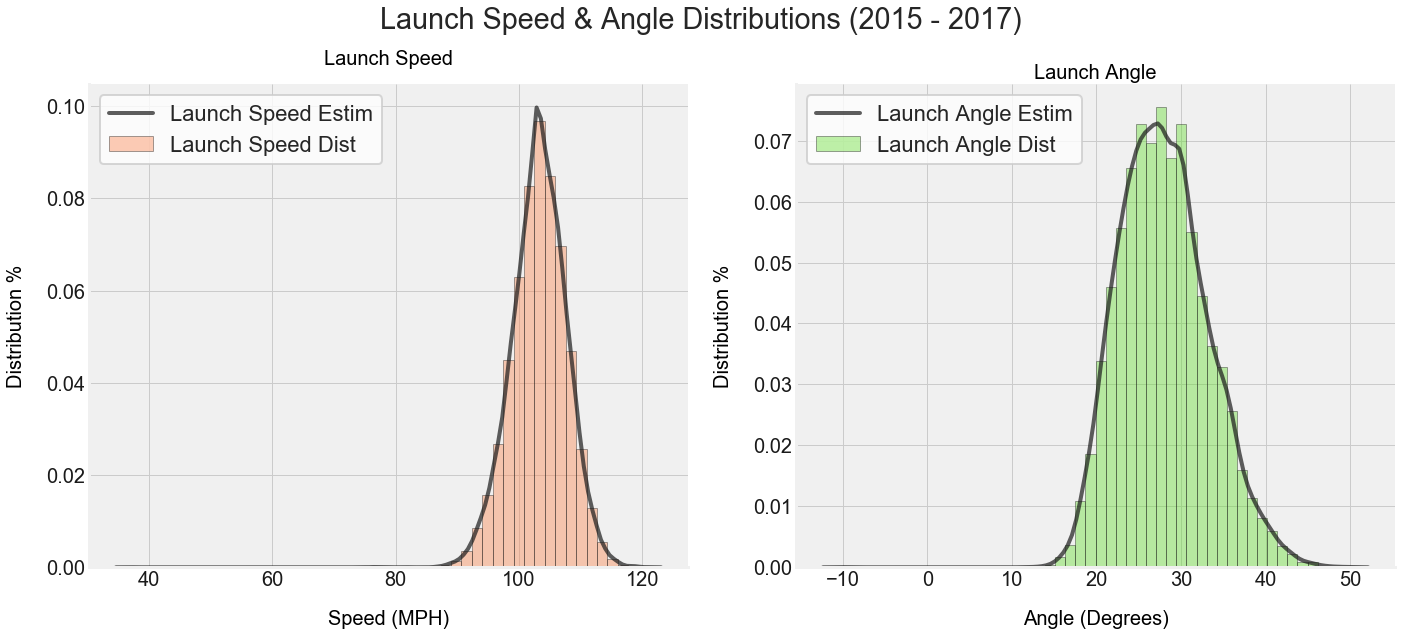

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,9))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

fig.suptitle('Launch Speed & Angle Distributions (2015 - 2017)', y=1)
a = sns.distplot(final_df['launch_speed'], 
                 color = '#fc824a', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim","alpha":.7},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 ax=axes[0], 
                 label='Launch Speed Dist')
b = sns.distplot(final_df['launch_angle'], 
                 color = '#61de2a', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Angle Estim","alpha":.7},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 ax=axes[1], 
                 label = 'Launch Angle Dist')

axes[0].set_xlabel('Speed (MPH)', fontsize=20, labelpad=20)
axes[0].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[0].set_title('Launch Speed', fontsize=20, pad=20)
axes[1].set_xlabel('Angle (Degrees)', fontsize=20, labelpad=20)
axes[1].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[1].set_title('Launch Angle', fontsize=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")

fig.tight_layout()
fig.subplots_adjust(top=0.88)

fig.savefig('../plots/subplots_angle_speed_all.png')

#### Hit Distance Distribution

The next feature I'd like to explore is the distribution on the distance the ball travels for all home runs hit across all seasons (2015, 2016, 2017). This will give me a sense of how far the batters are hitting the ball.

The distance of home runs on average look to be normally distrubuted between 300 and 500 feet.

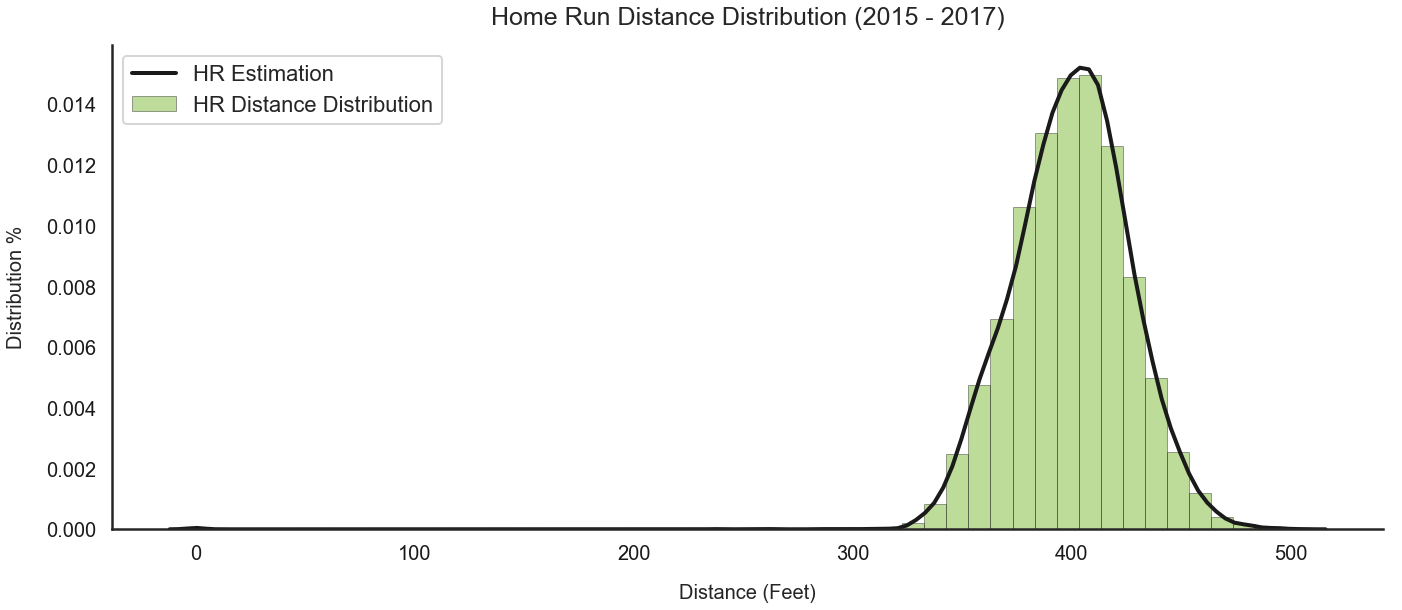

In [16]:
plt.figure(figsize=(20,9))
sns.set(style="white")
sns.set_context("poster")

plt.title('Home Run Distance Distribution (2015 - 2017)', fontsize=25, pad=20)

a = sns.distplot(final_df['hit_distance_sc'], 
                 color = '#5ca904', 
                 kde_kws={"color":"k","lw":4,"label":"HR Estimation","alpha":1},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 label='HR Distance Distribution')

plt.xlabel('Distance (Feet)', fontsize=20, labelpad=20)
plt.ylabel('Distribution %', fontsize=20, labelpad=20)

a.tick_params(labelsize=20,labelcolor="k")

sns.despine()

plt.tight_layout();
plt.savefig('../plots/hr_distance_all_seasons.png')

#### Exploration of Distributions by Year

I am focused on understanding what is influencing Home Run Exit velocities to find insights into what is causing an increase in home runs so I want to review the differences in launch speeds, launch angles and hit distances by year.

##### Launch Speeds

The 2015 season looks to have a much longer tail to the left hand side meaning there were some much slower home velocities in that year compared to the 2016 and 2017 season. The 2016 and 2017 seasons distributions look almost identical with the main difference being the fact that in 2017 we saw a record breaking number of home runs so there are more observations to show in the distribution.

##### Launch Angles

The launch angles between seasons is pretty consistent but one thing I am noticing is that there is a large increase in home runs that were between the angles of 25 and 50. Meaning that more "Fly Ball" home runs are being hit (more on this later).

- Batted Ball Type by Launch Angle:
    - Ground ball: Less than 10 degrees
    - Line drive: 10-25 degrees
    - Fly ball: 25-50 degrees
    - Pop up: Greater than 50 degrees

##### Home Run Distances

What shows itself immediately as far as home run distances is the fact that in the 2017 and 2016 seasons the batters are consistently hitting home runs further on average at around 400ft compared to the 2015 season which has more spread across 375ft to 425ft.

In [17]:
launch_speed17 = final_df[final_df['game_year'] == 2017][['launch_speed']]
launch_speed16 = final_df[final_df['game_year'] == 2016][['launch_speed']]
launch_speed15 = final_df[final_df['game_year'] == 2015][['launch_speed']]

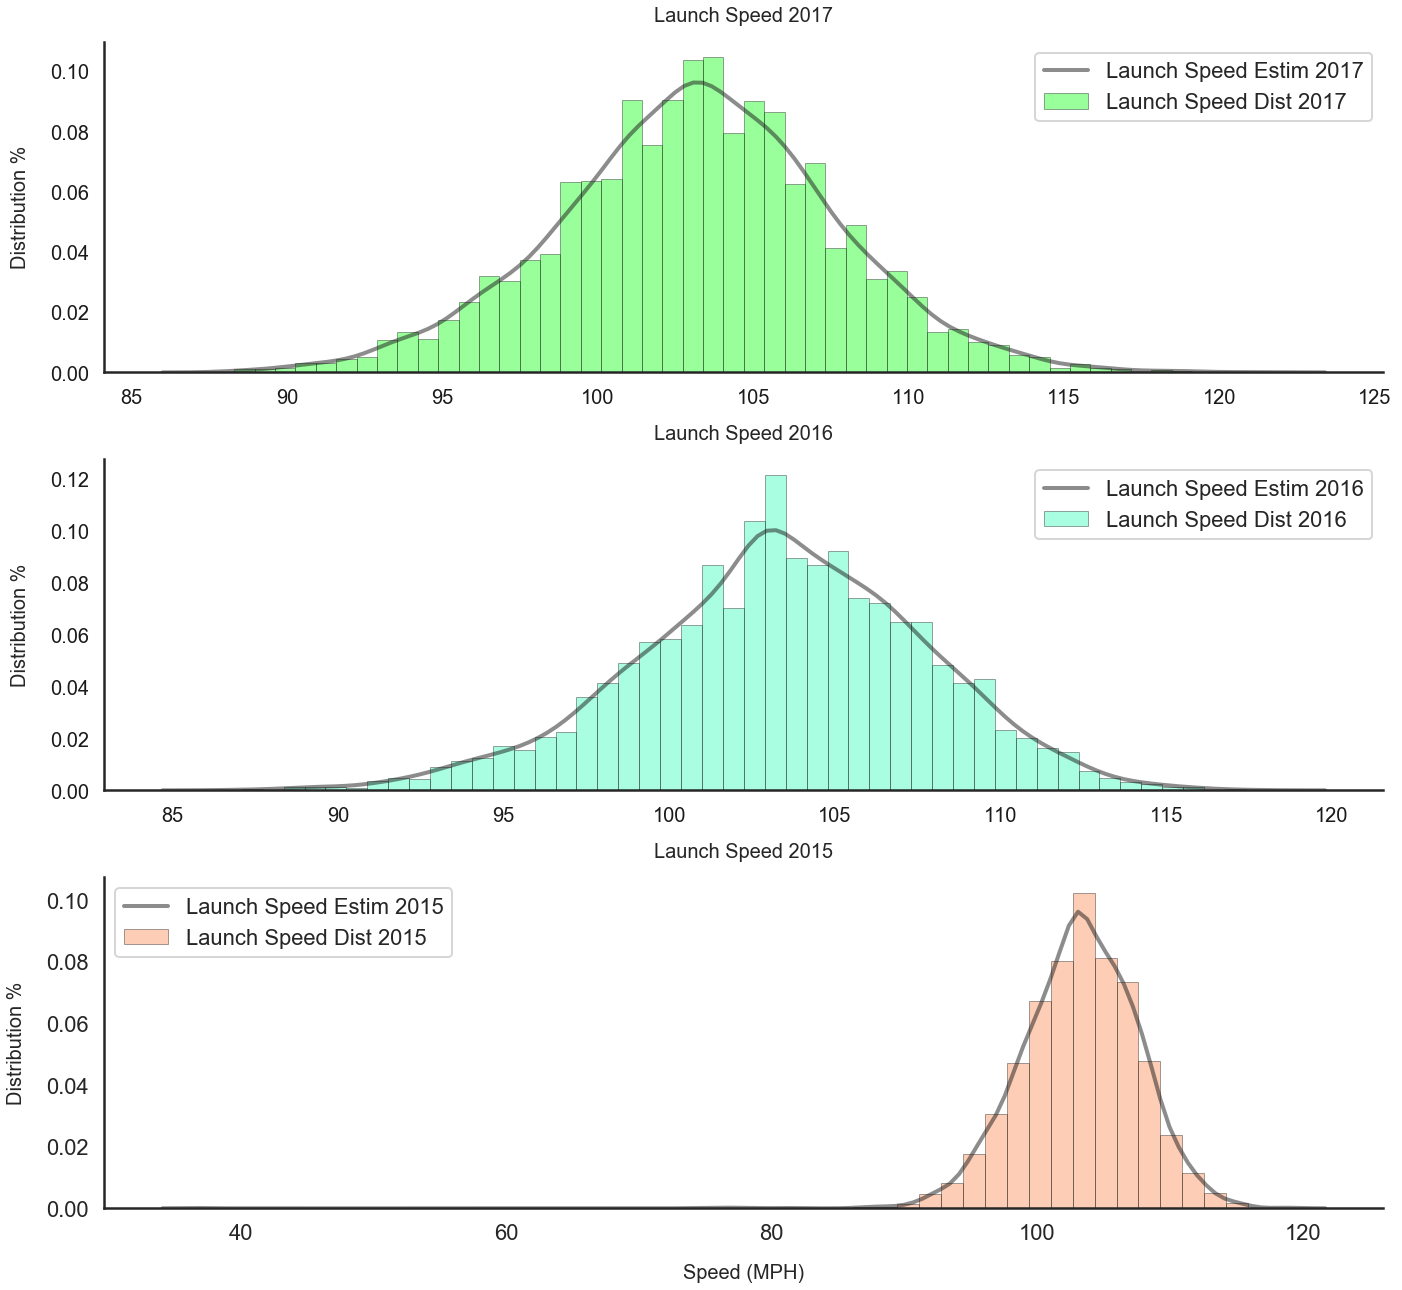

In [18]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(20,20))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

a = sns.distplot(launch_speed17, 
                 color = '#01ff07', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim 2017","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[0],
                 label='Launch Speed Dist 2017')
b = sns.distplot(launch_speed16, 
                 color = '#2afeb7', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim 2016","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[1],
                 label = 'Launch Speed Dist 2016')
c = sns.distplot(launch_speed15, 
                 color = '#fc824a', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Speed Estim 2015","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[2],
                 label = 'Launch Speed Dist 2015')

axes[0].set_xlabel('')
axes[0].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[0].set_title('Launch Speed 2017', fontsize=20, pad=20)
axes[1].set_xlabel('')
axes[1].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[1].set_title('Launch Speed 2016', fontsize=20, pad=20)
axes[2].set_xlabel('Speed (MPH)', fontsize=20, labelpad=20)
axes[2].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[2].set_title('Launch Speed 2015', fontsize=20, pad=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)

fig.savefig('../plots/subplots_speed_by_year.png')

In [19]:
launch_angle17 = final_df[final_df['game_year'] == 2017][['launch_angle']]
launch_angle16 = final_df[final_df['game_year'] == 2016][['launch_angle']]
launch_angle15 = final_df[final_df['game_year'] == 2015][['launch_angle']]

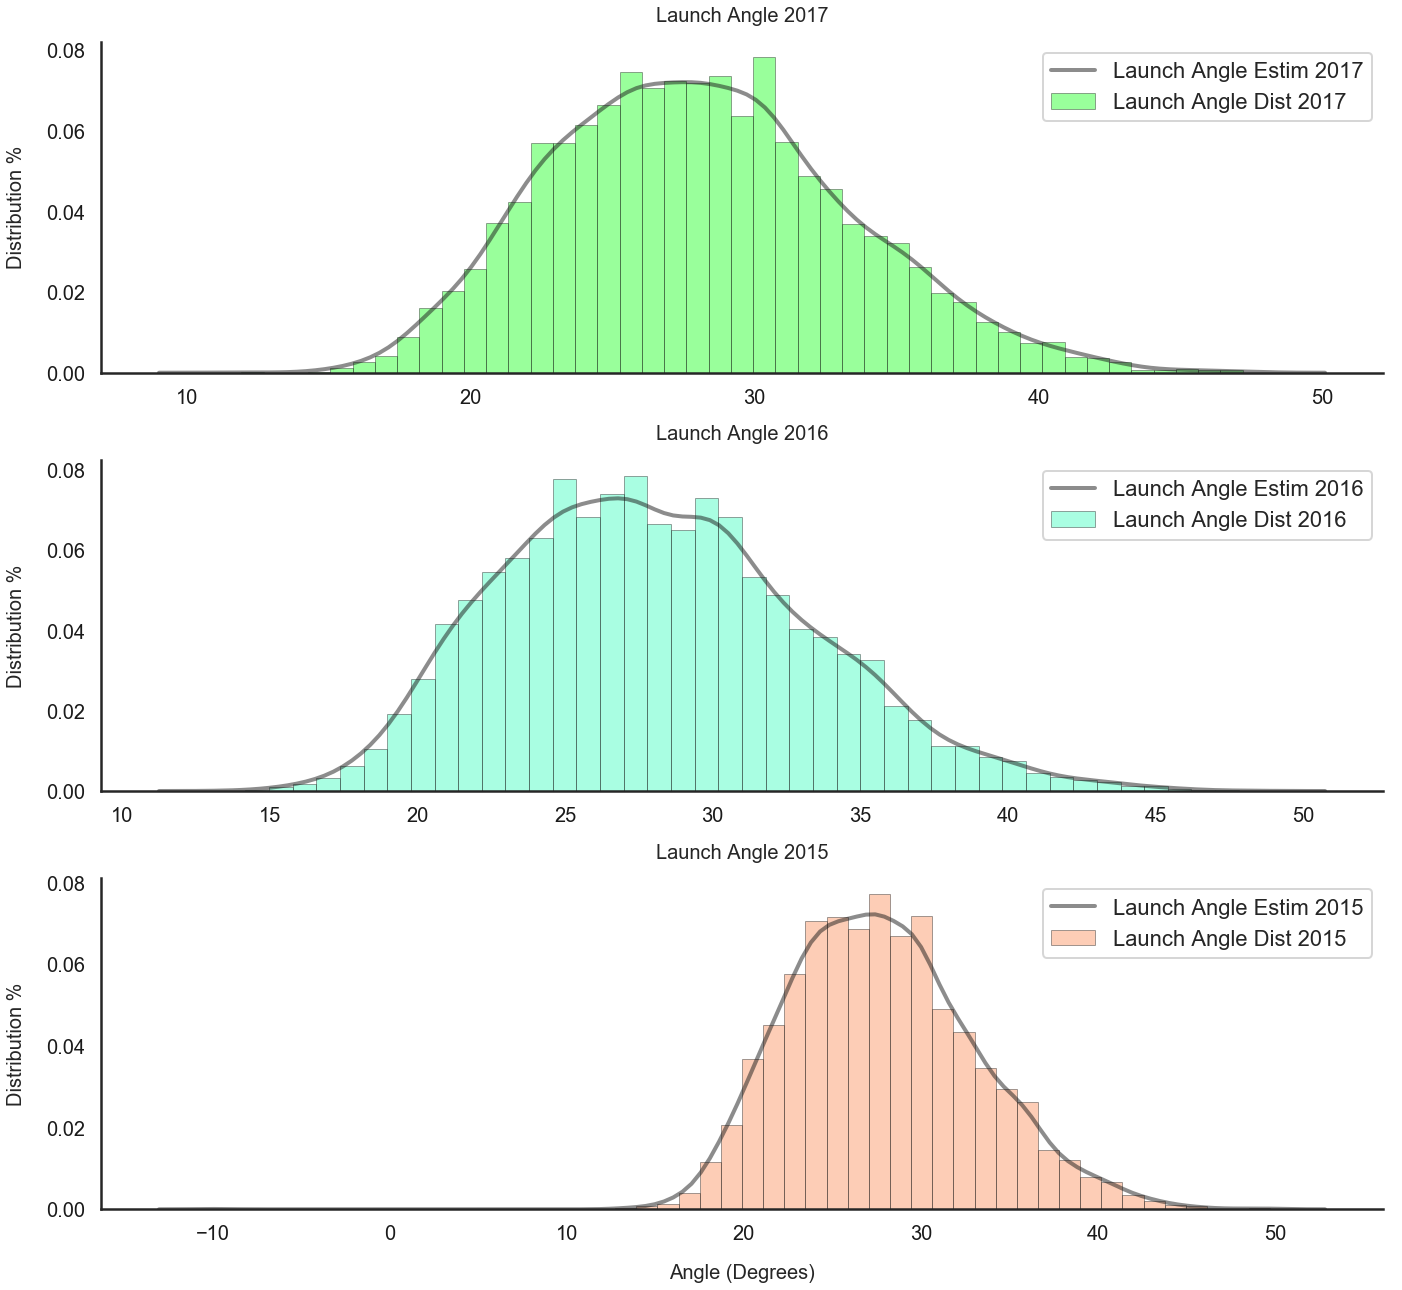

In [20]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(20,20))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

a = sns.distplot(launch_angle17, 
                 color = '#01ff07', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Angle Estim 2017","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[0],
                 label='Launch Angle Dist 2017')
b = sns.distplot(launch_angle16, 
                 color = '#2afeb7', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Angle Estim 2016","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[1],
                 label = 'Launch Angle Dist 2016')
c = sns.distplot(launch_angle15, 
                 color = '#fc824a', 
                 kde_kws={"color":"k","lw":4,"label":"Launch Angle Estim 2015","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[2],
                 label = 'Launch Angle Dist 2015')

axes[0].set_xlabel('')
axes[0].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[0].set_title('Launch Angle 2017', fontsize=20, pad=20)
axes[1].set_xlabel('')
axes[1].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[1].set_title('Launch Angle 2016', fontsize=20, pad=20)
axes[2].set_xlabel('Angle (Degrees)', fontsize=20, labelpad=20)
axes[2].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[2].set_title('Launch Angle 2015', fontsize=20, pad=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")
c.tick_params(labelsize=20,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)

fig.savefig('../plots/subplots_angle_by_year.png')

In [21]:
hr_distance17 = final_df[final_df['game_year'] == 2017][['hit_distance_sc']]
hr_distance16 = final_df[final_df['game_year'] == 2016][['hit_distance_sc']]
hr_distance15 = final_df[final_df['game_year'] == 2015][['hit_distance_sc']]

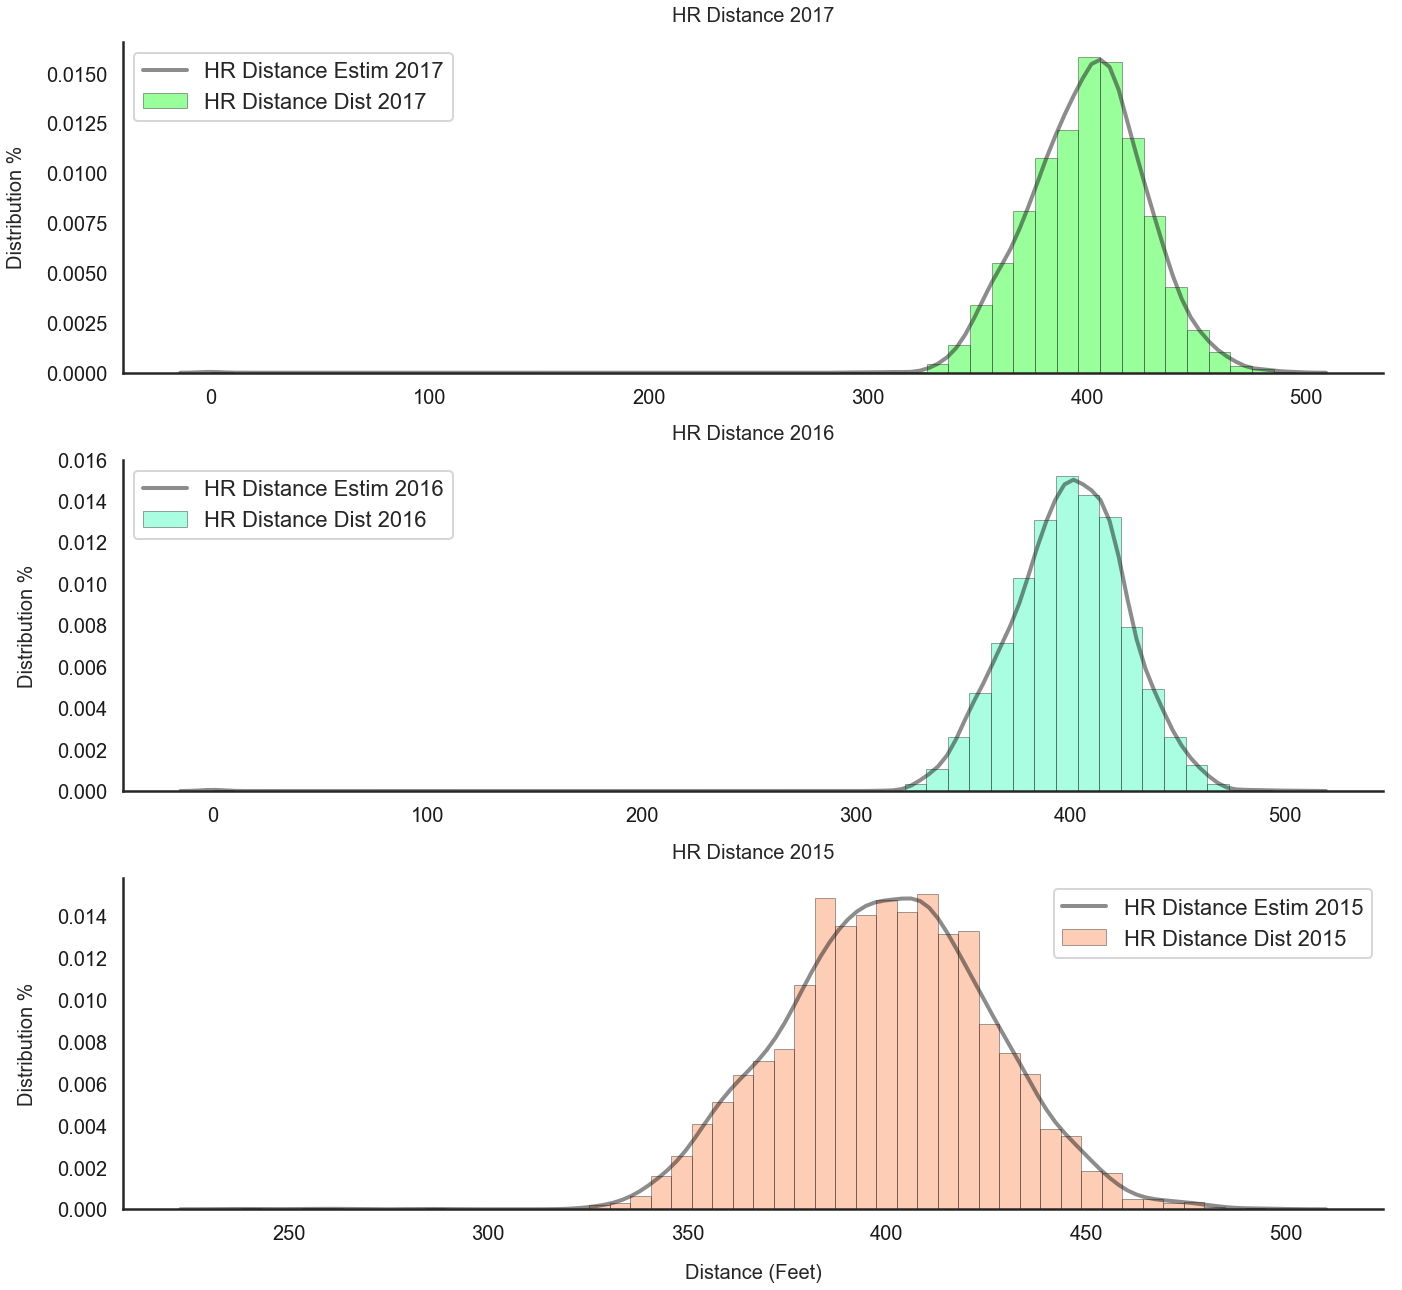

In [22]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(20,20))
sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster")

a = sns.distplot(hr_distance17, 
                 color = '#01ff07', 
                 kde_kws={"color":"k","lw":4,"label":"HR Distance Estim 2017","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[0],
                 label='HR Distance Dist 2017')
b = sns.distplot(hr_distance16, 
                 color = '#2afeb7', 
                 kde_kws={"color":"k","lw":4,"label":"HR Distance Estim 2016","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[1],
                 label = 'HR Distance Dist 2016')
c = sns.distplot(hr_distance15, 
                 color = '#fc824a', 
                 kde_kws={"color":"k","lw":4,"label":"HR Distance Estim 2015","alpha":.5},
                 hist_kws={'edgecolor':"k", 'linewidth':1},
                 norm_hist=False,
                 ax=axes[2],
                 label = 'HR Distance Dist 2015')

axes[0].set_xlabel('', fontsize=20, labelpad=20)
axes[0].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[0].set_title('HR Distance 2017', fontsize=20, pad=20)
axes[1].set_xlabel('', fontsize=20, labelpad=20)
axes[1].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[1].set_title('HR Distance 2016', fontsize=20, pad=20)
axes[2].set_xlabel('Distance (Feet)', fontsize=20, labelpad=20)
axes[2].set_ylabel('Distribution %', fontsize=20, labelpad=20)
axes[2].set_title('HR Distance 2015', fontsize=20, pad=20)

a.tick_params(labelsize=20,labelcolor="k")
b.tick_params(labelsize=20,labelcolor="k")
c.tick_params(labelsize=20,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)
plt.savefig('../plots/home_run_distance_season_subplot.png')

#### Review correlations 

Next, I want to review the pearson correlations between my target variable and the features within my data to get an understanding about the linear correlations within my data. 

The following features which I've been reviewing above make perfect sense:
- `hit Distance` : is showing a positive correlation to launch speed and this makes sense that as launch speed increases so will the distance at which the ball travels.
- `launch angle` : is showing a negative correlation to launch speed and this makes sense that as launch angle increases the speed of the hit decreases because the batter is not making optimal contact with the ball.

The following features are also showing positive correlations and are worth keeping an eye on as we get into the modeling process:
- `weight` and `height` : Both showing postive correlations meaning that the height and weight of batter is influencing the speed at which their hits come off the bat.
- `sz_top` and `sz_bottom` : These are measurements of the strike zone based on the batter who is hitting so players who are taller will have larger measurements.

The following features are also showing negative correlations and are worth keeping an eye on as we get into the modeling process:
- `vz0` and `vy0` : Both showing negative correlations meaning that as the velocity of the pitch increases the launch speed of the ball off the bat is decreasing

Additional Notes: 
- `avg_ccor` : the measurement for the "bounciness" of the baseball is showing as postive but extremely low postive and almost no linear correlation.
- `weight_(oz)` : the weight of the overall baseball is showing as postive but extremely low postive and almost no linear correlation.

In [23]:
corr_df_launch_speed = final_df.corr()['launch_speed'].sort_values(ascending=False).to_frame()

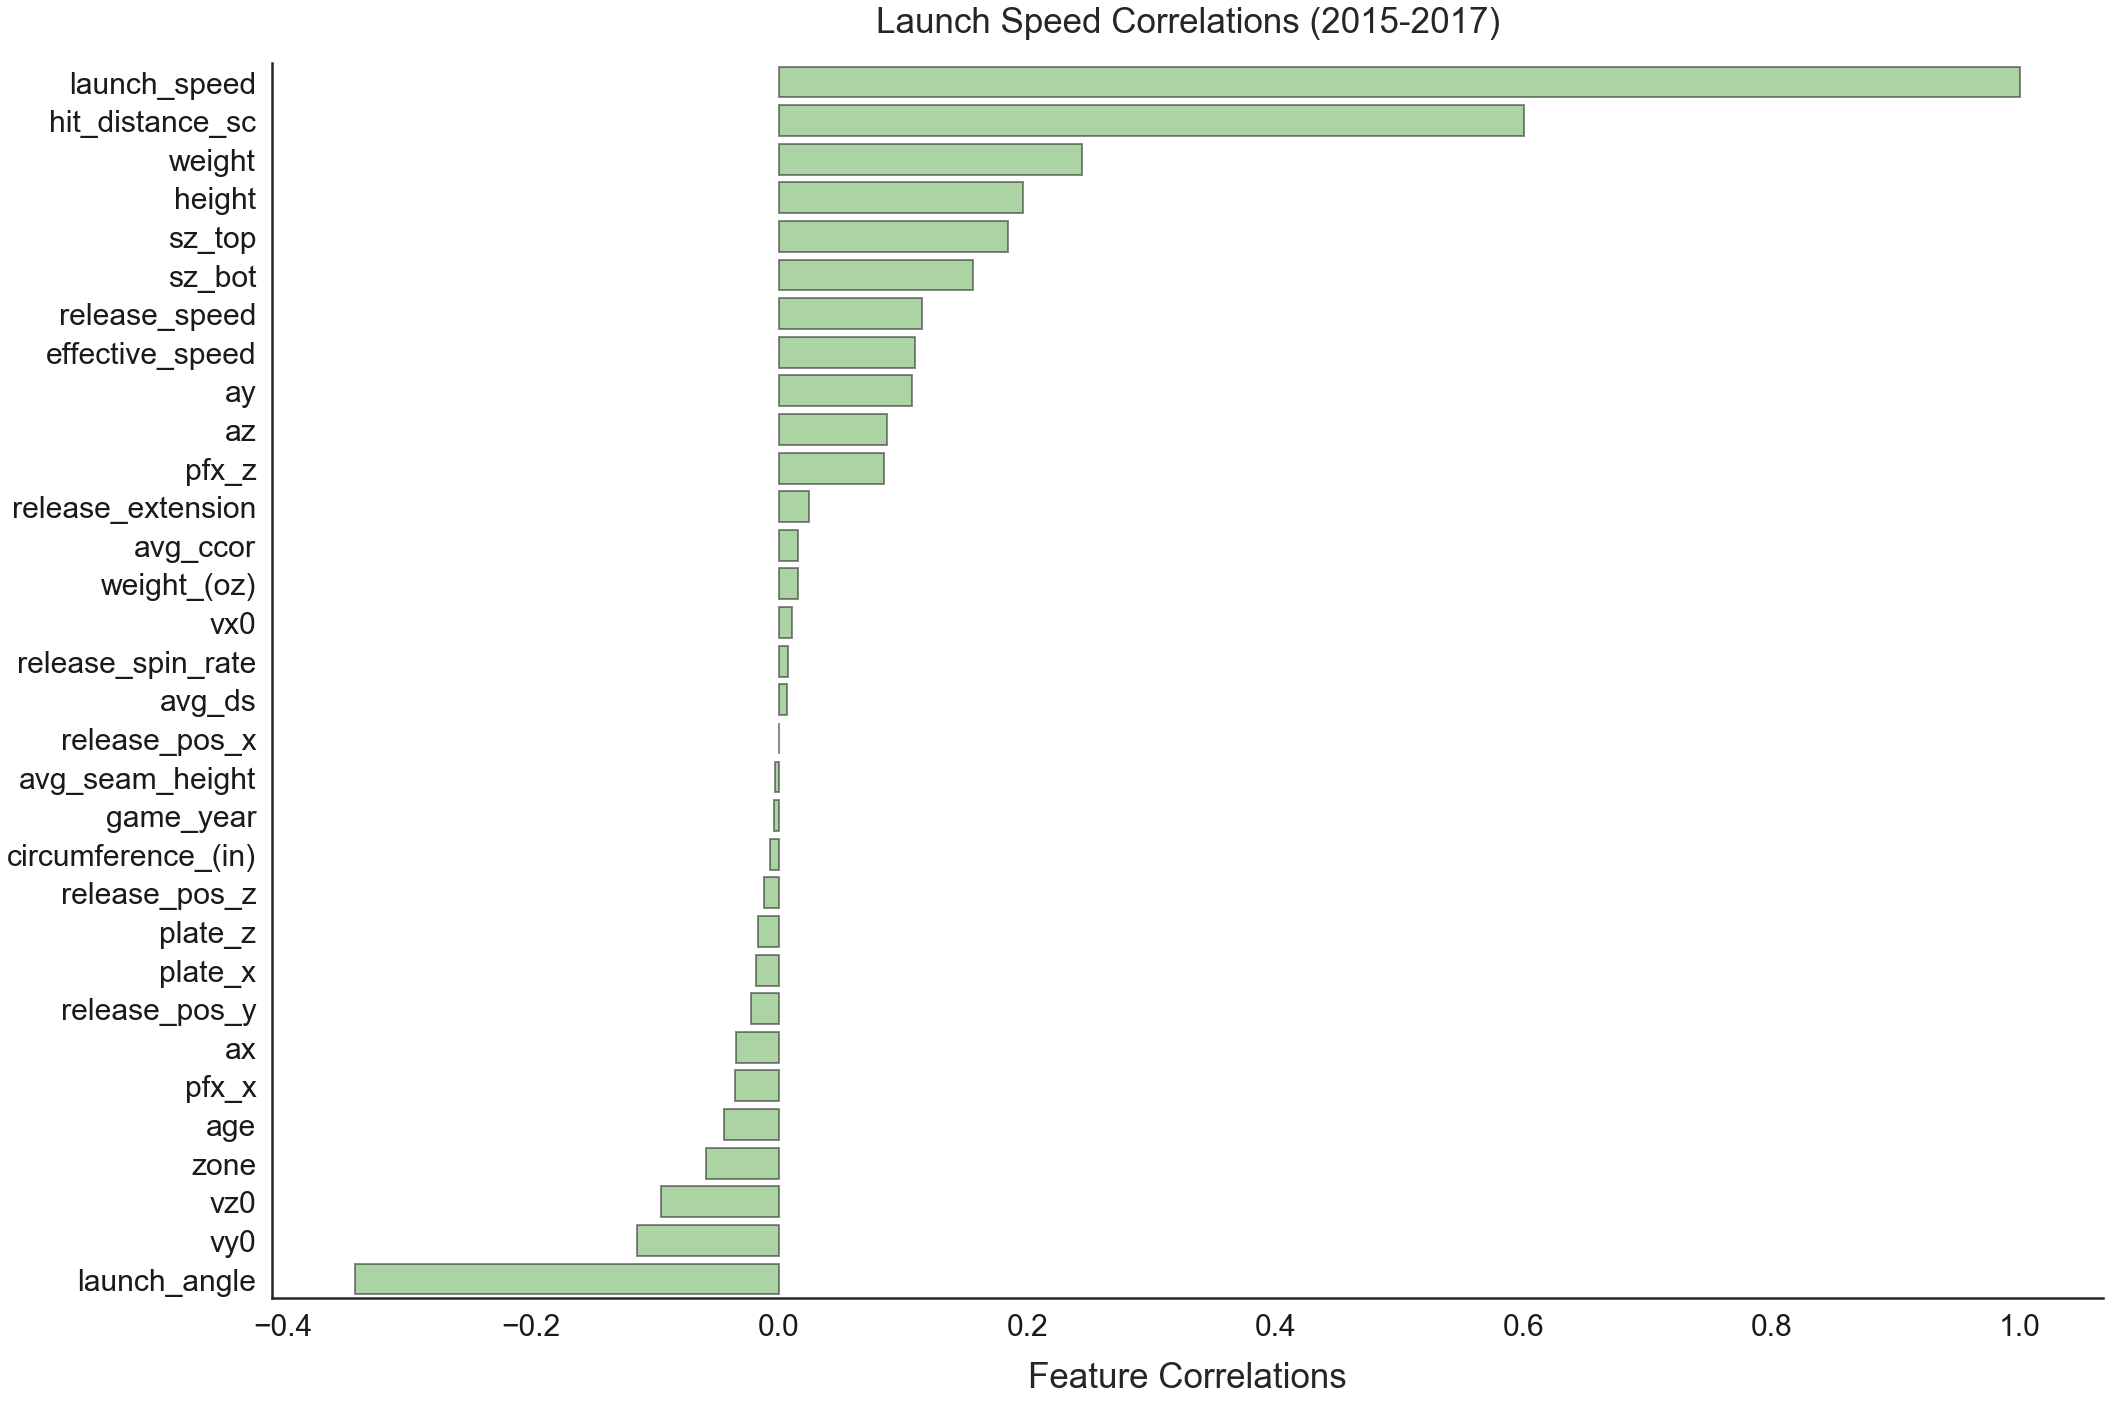

In [24]:
plt.figure(figsize=(30,20))

sns.set(style="white")
sns.set_context("poster", rc={'patch.linewidth':2})

plt.title('Launch Speed Correlations (2015-2017)', fontsize=35, pad=30)

a = sns.barplot(corr_df_launch_speed['launch_speed'],
                corr_df_launch_speed.index, 
                color='#51b73b', alpha=.5, edgecolor='k')

plt.xlabel('Feature Correlations', fontsize=35, labelpad=20)

a.tick_params(labelsize=30, labelcolor="k")
sns.despine()

plt.tight_layout();

plt.savefig('../plots/launch_speed_correlations.png')

#### Reviewing top postive continuous variable correlations

Using a loop on the subplots axes I will plot the top 6 positive correlations and top 3 negative correlations as scatter plots to get a visual of the linear relationships.

##### Interpretation of Scatter Plots

One thing I can notice immeditely are outliers within the `hit_distance_sc` variable. Specifically, I can see observations showing as zero feet which I believe are "inside the park home runs." Let's see how much the pearson correlations change after we remove the outliers.

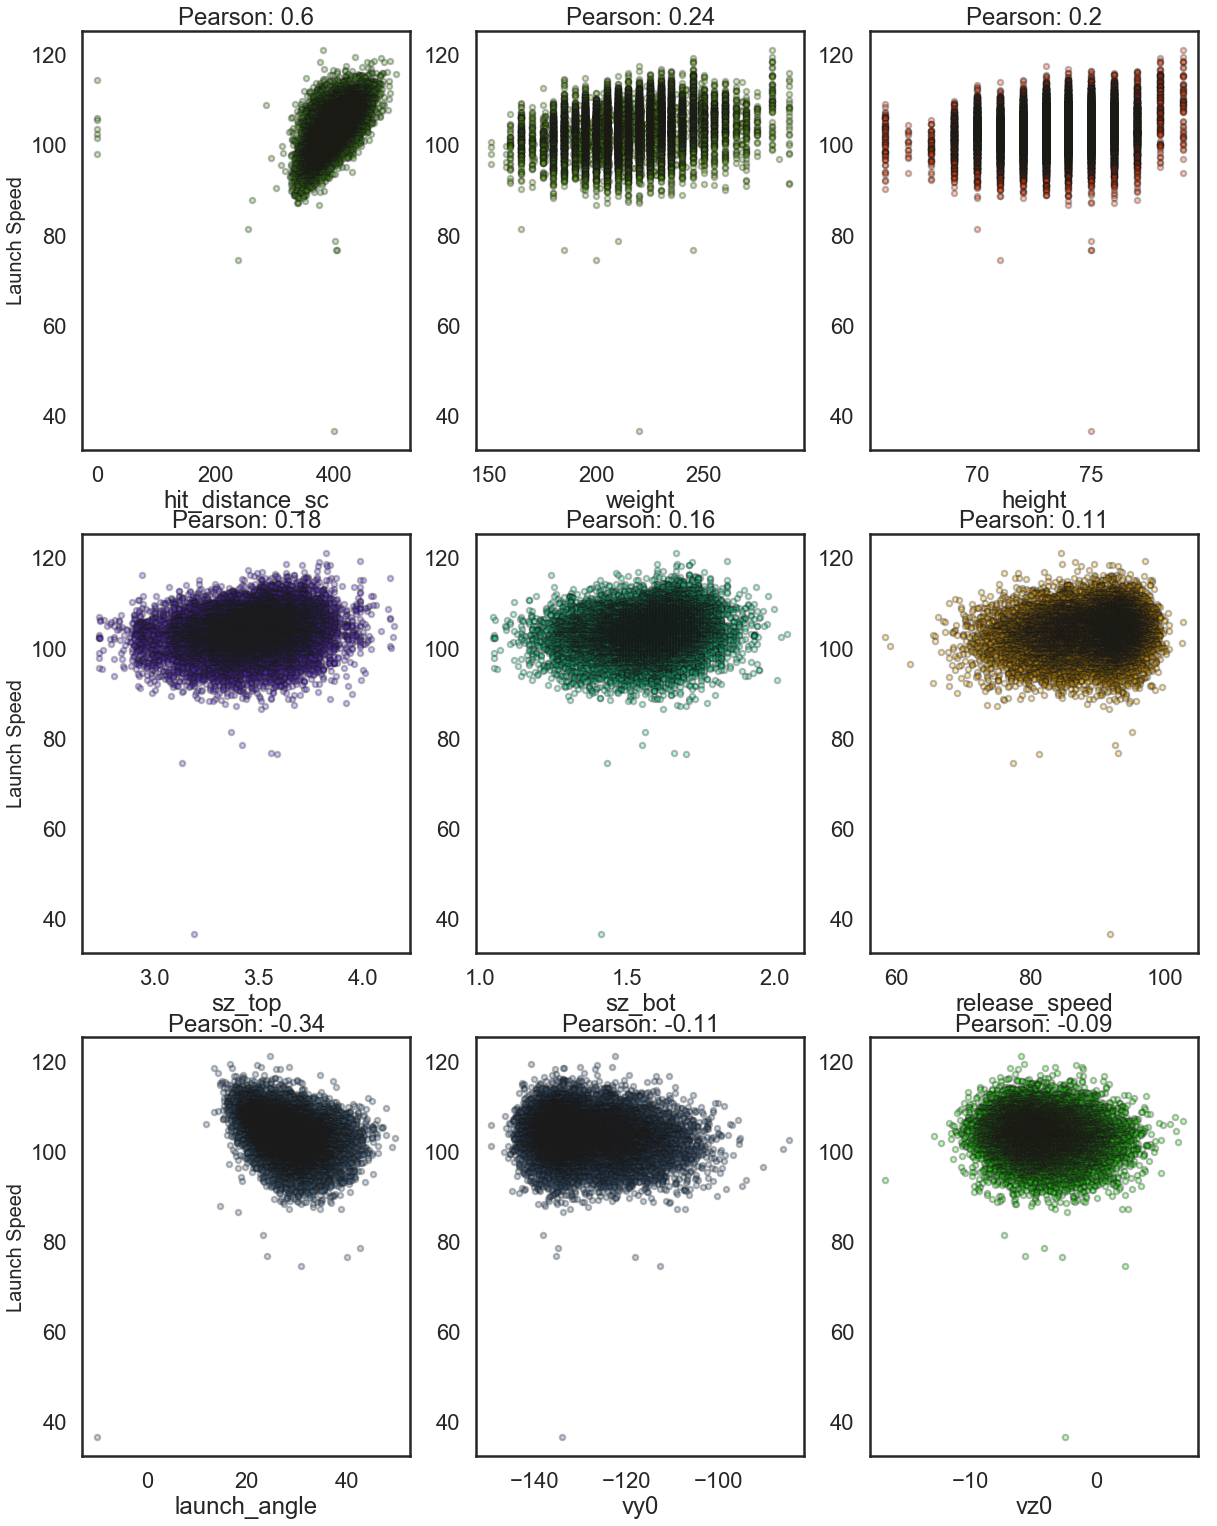

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
fig.subplots_adjust(left=0.125, bottom=0.01, right=0.9, top=1.0, wspace=None, hspace=.2)

ax=ax.flatten()

cols = ['hit_distance_sc', 
        'weight', 
        'height',
        'sz_top', 
        'sz_bot', 
        'release_speed', 
        'launch_angle', 
        'vy0', 
        'vz0']
colors=['#3f9b0b', 
        '#5ca904', 
        '#fd3c06', 
        '#632de9', 
        '#12e193', 
        '#fcb001', 
        '#49759c', 
        '#3b638c', 
        '#21fc0d', 
        '#98568d']

j=0
for i in ax:
    if j==0 or j==3 or j==6:
        i.set_ylabel('Launch Speed', fontsize=20)
    i.scatter(final_df[cols[j]], final_df['launch_speed'],  alpha=0.3, color=colors[j], s=30, edgecolors='k')
    i.set_xlabel(cols[j])
    i.set_title(f'Pearson: {final_df.corr().loc[cols[j]]["launch_speed"].round(2)}')
    j+=1

#### Remove Outliers

By removing the hit distance values that were equal to zero I increased the postive linear correlation of `hit_distance_sc` by .03 which isn't huge but I do want to only include home runs that actually left the ball park. I will remove these values from final data frame beacuse of this conclusion. 

The rest of the correlations stayed the same. I could continue to identify outliers but because they were actual home run hits with launch speeds I will keep them in the data frame for modeling.

In [25]:
mask = final_df[final_df['hit_distance_sc'] < 200]
mask.index.values

array([   67,  5108,  5998,  9827, 11999, 13632, 18568])

In [26]:
final_df2 = final_df.drop(mask.index.values)

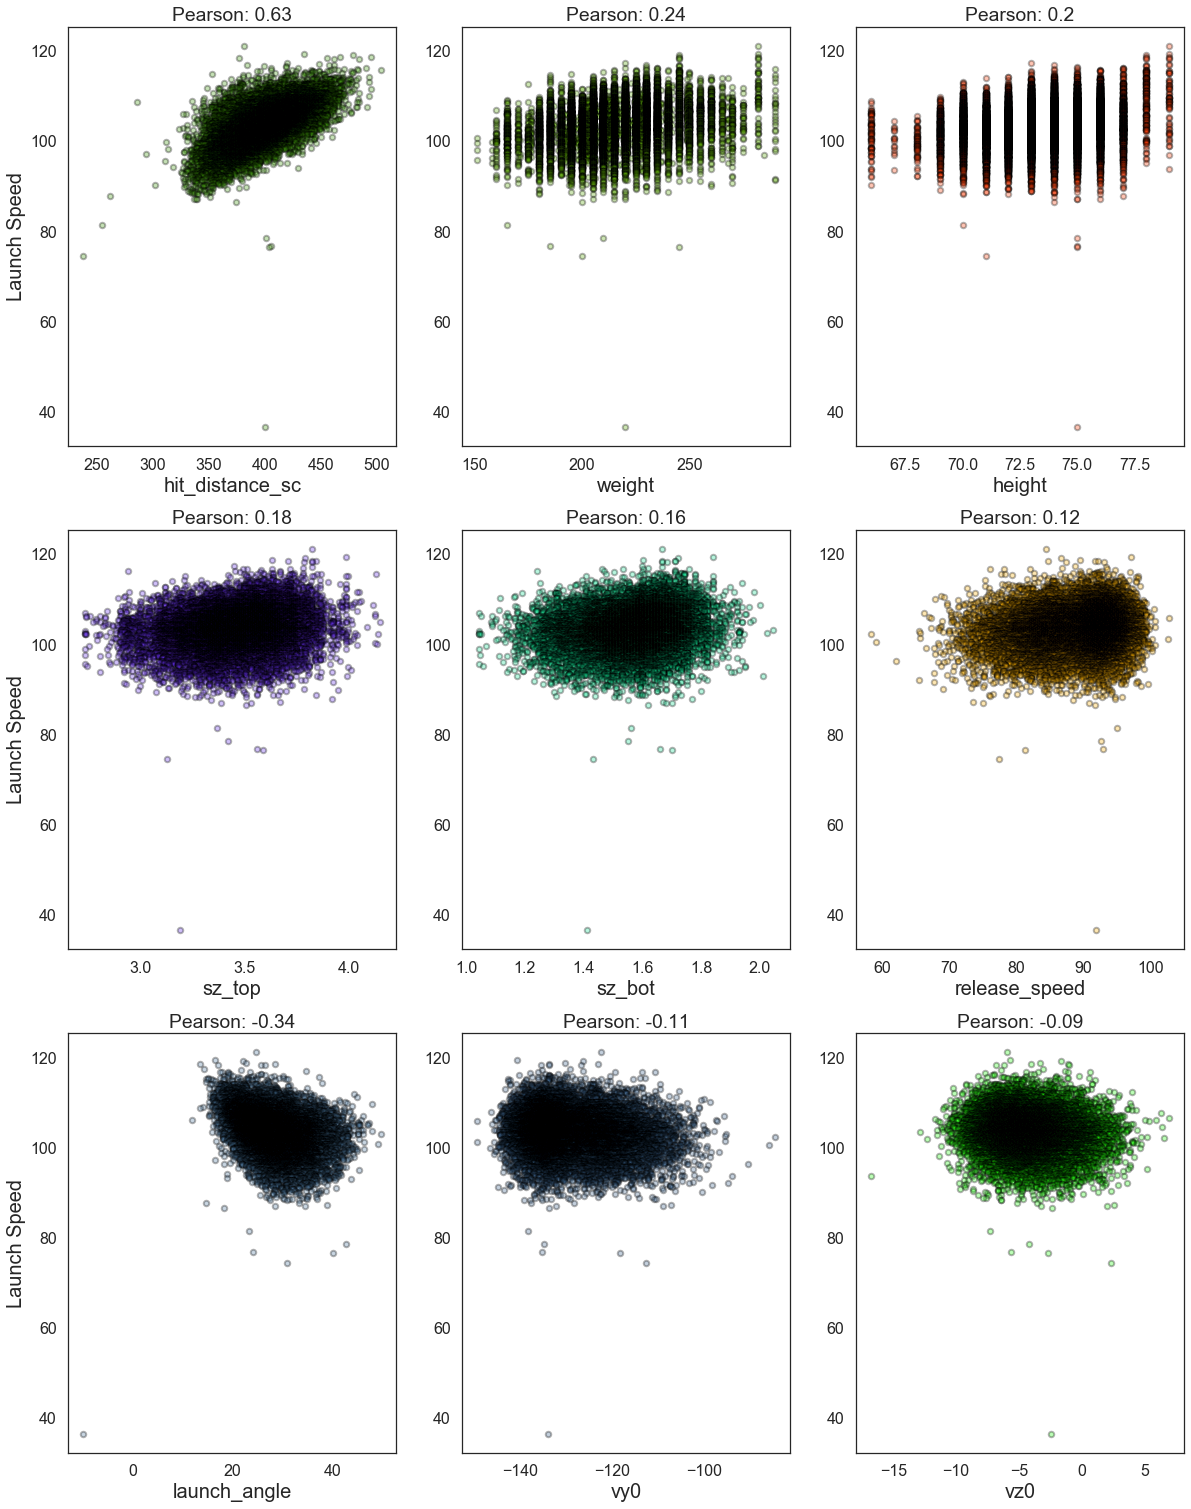

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
fig.subplots_adjust(left=0.125, bottom=0.01, right=0.9, top=1, wspace=None, hspace=.2)

ax=ax.flatten()

cols = ['hit_distance_sc', 
        'weight', 
        'height',
        'sz_top', 
        'sz_bot', 
        'release_speed', 
        'launch_angle', 
        'vy0', 
        'vz0']
colors=['#3f9b0b', 
        '#5ca904', 
        '#fd3c06', 
        '#632de9', 
        '#12e193', 
        '#fcb001', 
        '#49759c', 
        '#3b638c', 
        '#21fc0d', 
        '#98568d']

j=0
for i in ax:
    if j==0 or j==3 or j==6:
        i.set_ylabel('Launch Speed', fontsize=20)
    i.scatter(final_df2[cols[j]], final_df2['launch_speed'], s=30, alpha=0.3, color=colors[j], edgecolors='k')
    i.set_xlabel(cols[j], fontsize=20)
    i.set_title('Pearson: %s'%final_df2.corr().loc[cols[j]]['launch_speed'].round(2))
    j+=1

#### Drop Hit Distance Home Run Outliers

Dropping the Hit Distance Home Runs that are equal to zero from the final data frame prior to moving into the modeling.

In [28]:
final_df[final_df['hit_distance_sc'] == 0]

,pitch_type,release_speed,release_pos_x,release_pos_z,player_name,zone,p_throws,bb_type,game_year,pfx_x,...,release_extension,release_pos_y,height,weight,age,weight_(oz),circumference_(in),avg_seam_height,avg_ccor,avg_ds
67,SL,89.0,-0.6549,6.0643,Hanley Ramirez,9.0,R,line_drive,2016,0.363200,...,6.074,54.4262,74,235,34,5.122500,9.079,0.038432,0.494100,12926.4
5108,SL,87.9,-2.4077,6.2765,Cody Bellinger,4.0,R,fly_ball,2017,-0.502900,...,5.978,54.5221,76,210,23,5.104863,9.080,0.038000,0.476463,12926.0
5998,CH,86.4,0.8119,5.7367,Evan Longoria,7.0,L,line_drive,2016,1.256100,...,6.310,54.1901,73,215,32,5.122500,9.079,0.038432,0.494100,12926.4
9827,FF,92.1,2.8788,5.5237,Jose Peraza,1.0,L,fly_ball,2017,0.325900,...,6.838,53.6625,72,196,24,5.104863,9.080,0.038000,0.476463,12926.0
11999,CU,83.5,-1.0145,5.7647,Stephen Piscotty,7.0,R,fly_ball,2016,0.160858,...,6.450,54.0517,75,210,27,5.122500,9.079,0.038432,0.494100,12926.4
13632,SL,85.7,3.5189,6.6063,Aaron Hill,7.0,L,fly_ball,2016,0.151117,...,4.533,55.9658,71,200,36,5.122500,9.079,0.038432,0.494100,12926.4
18568,FT,92.3,-0.9786,7.1346,Aaron Hicks,11.0,R,fly_ball,2017,-1.012900,...,5.988,54.5100,73,202,29,5.104863,9.080,0.038000,0.476463,12926.0


In [29]:
final_df.reset_index(inplace=True)

In [30]:
mask = final_df[final_df['hit_distance_sc'] == 0]
mask.index.values

array([   67,  4326,  5007,  7937,  9583, 10797, 14510])

In [31]:
final_df = final_df.drop(mask.index.values)

In [32]:
final_df.drop('index', axis=1, inplace=True)

#### Review Pitch Types

Another main data point within my dataset is the the type of pitch that was thrown on each of the home run hits. Lets take a look at if we can identify any significant differences in launch speeds based on the picth type.

##### Interpretation

The below plot is showing the launch speeds for each home run that was hit off of these pitch types by year. It is immediately clear that there is no significant difference in the launch speeds amongst pitch types. (Moving on...)

In [33]:
pitch_launch_speed = final_df.groupby(['pitch_type', 'game_year']).mean()[['launch_speed']]
pitch_launch_speed.reset_index(inplace=True)

In [34]:
pitch_17 = pitch_launch_speed[pitch_launch_speed['game_year'] == 2017].sort_values('pitch_type', ascending=False)
pitch_16 = pitch_launch_speed[pitch_launch_speed['game_year'] == 2016].sort_values('pitch_type', ascending=False)
pitch_15 = pitch_launch_speed[pitch_launch_speed['game_year'] == 2015].sort_values('pitch_type', ascending=False)

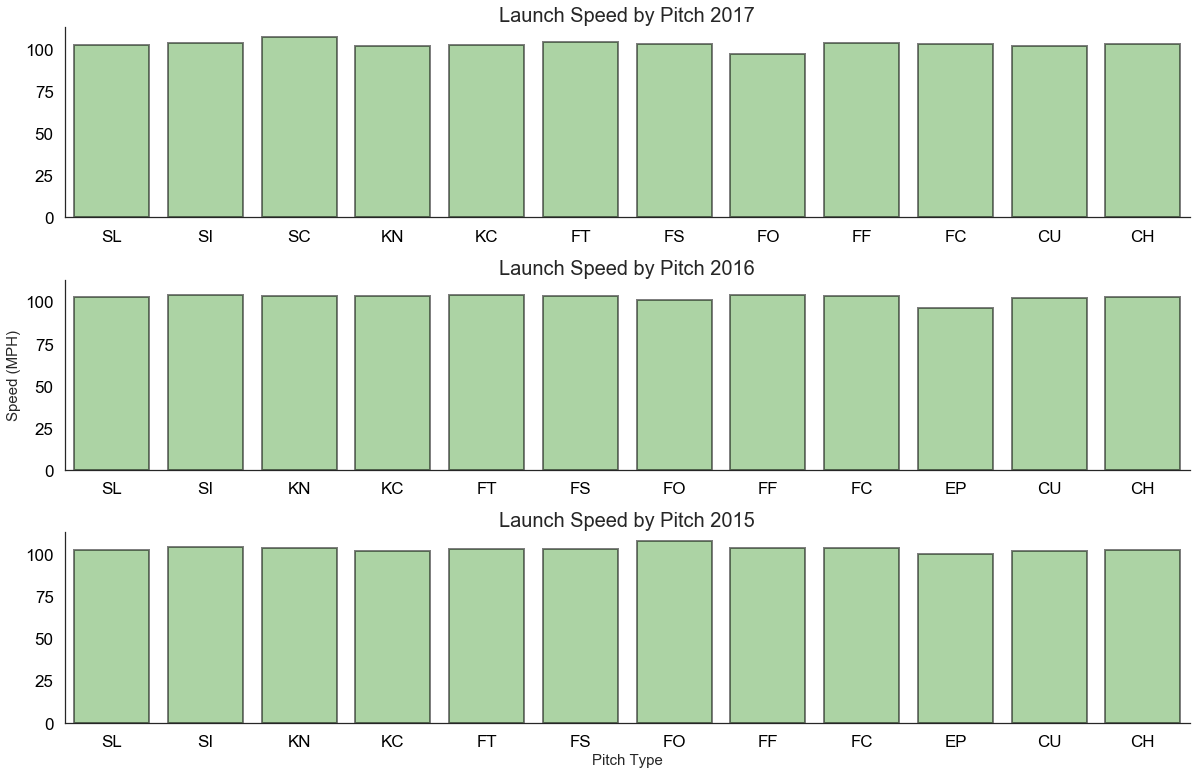

In [35]:
fig, axes = plt.subplots(ncols=1, nrows=3, sharey=True, figsize=(17,12))

sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster", rc={'patch.linewidth':2})



a = sns.barplot(pitch_17['pitch_type'], 
                pitch_17['launch_speed'],
                color='#51b73b', 
                alpha=.5, 
                edgecolor='k',
                ax=axes[0],
                label='Launch Speeds 2017')

b = sns.barplot(pitch_16['pitch_type'], 
                pitch_16['launch_speed'],
                color='#51b73b', 
                alpha=.5, 
                edgecolor='k',
                ax=axes[1],
                label='Launch Speeds 2016')

c = sns.barplot(pitch_15['pitch_type'], 
                pitch_15['launch_speed'],
                color='#51b73b', 
                alpha=.5, 
                edgecolor='k',
                ax=axes[2],
                label='Launch Speeds 2015')

axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_title('Launch Speed by Pitch 2017', fontsize=20)
axes[1].set_ylabel('Speed (MPH)', fontsize=15)
axes[1].set_xlabel('')
axes[1].set_title('Launch Speed by Pitch 2016', fontsize=20)
axes[2].set_ylabel('')
axes[2].set_xlabel('Pitch Type', fontsize=15)
axes[2].set_title('Launch Speed by Pitch 2015', fontsize=20)

a.tick_params(labelsize=17,labelcolor="k")
b.tick_params(labelsize=17,labelcolor="k")
c.tick_params(labelsize=17,labelcolor="k")


fig.tight_layout();
fig.subplots_adjust(top=0.88)

#### Home Run Totals by Pitch Type

We didn't see any differences in the launch speeds between pitches so now lets take a look at the home run totals by pitch type to investigate the differences.

##### Interpretation

This plot is showing that there is a main difference in the types of pitches that are hit for home runs. The following pitches are showing as being hit for the most home runs by players and it makes sense as these are the types of pitches thrown most often by pitchers:
- `FF` : `Four-seam Fastball`
    - The Four-seam Fastball is the fastest pitch thrown and as our correlation plot also confirmed with an increase in acceleration there will be an increase in launch speed ultimately leading to a home run.
- `SL` : `Slider`
- `FT` : `Two-seam Fastball`
- `CH` : `Changeup`

In [36]:
pitch_type_counts = final_df['pitch_type'].value_counts().to_frame()
pitch_type_counts.reset_index(inplace=True)

In [37]:
pitch_type_counts.columns = ['pitch_type', 'pitch_counts']
pitch_type_counts.set_index('pitch_type', inplace=True)

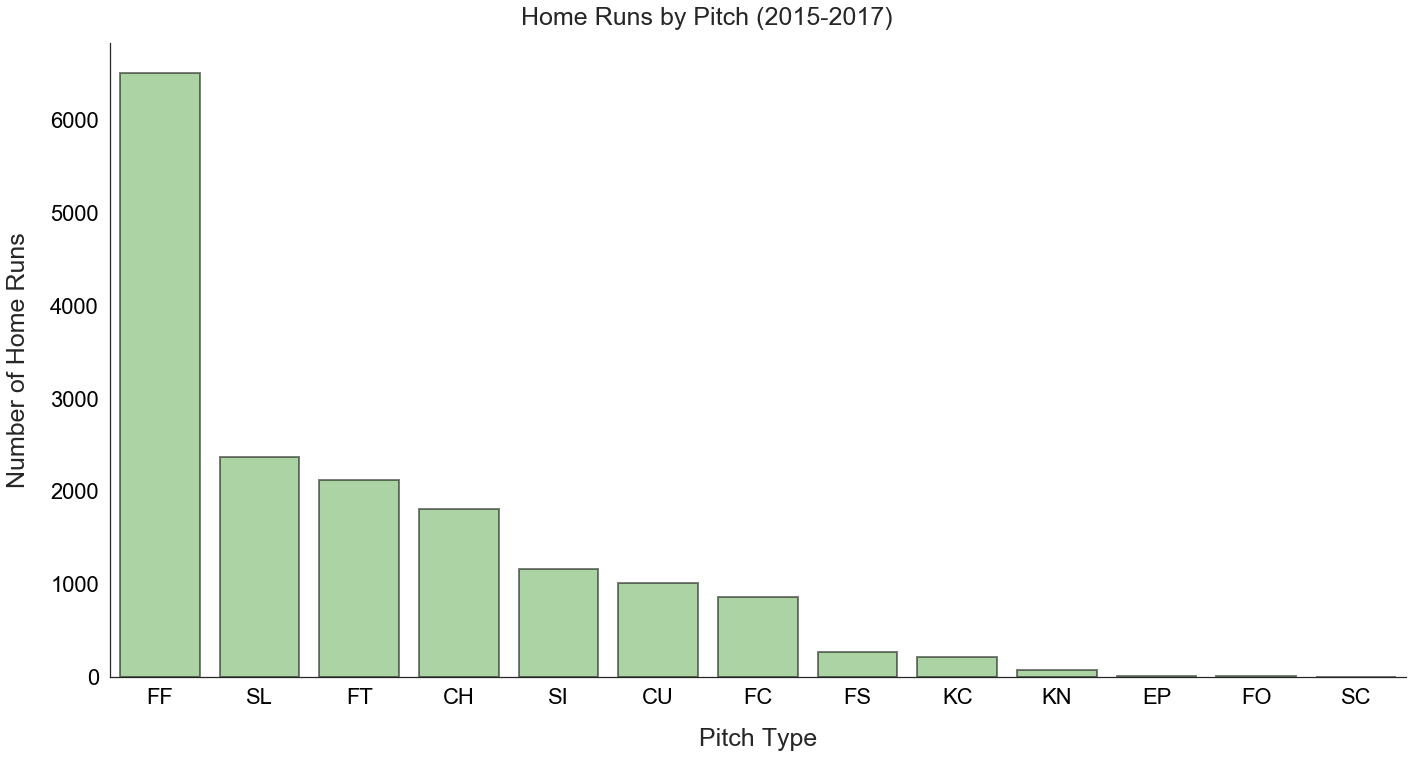

In [38]:
plt.figure(figsize=(20,5))

sns.set(style="white")
sns.set_context("poster", rc={'patch.linewidth':2})

plt.suptitle('Home Runs by Pitch (2015-2017)', fontsize=25)

a = sns.barplot(pitch_type_counts.index,
                pitch_type_counts['pitch_counts'], 
                color='#51b73b', alpha=.5, edgecolor='k')

plt.xlabel('Pitch Type', fontsize=25, labelpad=20)
plt.ylabel('Number of Home Runs', fontsize = 25, labelpad=20)

a.tick_params(labelsize=22,labelcolor="k")
sns.despine()

plt.tight_layout();
plt.subplots_adjust(top=0.88, bottom=-0.88)

plt.savefig('../plots/home_run_totals_pitch_type.png')

#### Home Run Totals by Pitch Type by Year

Lets take a look at the same data but separate it by year to understand if there are any significant differences in what types of pitches batters are hitting for home runs from year to year.

##### Interpretation

Very consistent with the overall home run total plot for pitch type but there is one difference in that the `curveball` pitch was hit for more home runs in the years 2016 and 2017 than in 2015.

In [39]:
pitch_type_counts17 = final_df[final_df['game_year'] == 2017][['pitch_type']]
pitch_type_counts17 = pitch_type_counts17['pitch_type'].value_counts().to_frame()

In [40]:
pitch_type_counts16 = final_df[final_df['game_year'] == 2016][['pitch_type']]
pitch_type_counts16 = pitch_type_counts16['pitch_type'].value_counts().to_frame()

In [41]:
pitch_type_counts15 = final_df[final_df['game_year'] == 2015][['pitch_type']]
pitch_type_counts15 = pitch_type_counts15['pitch_type'].value_counts().to_frame()

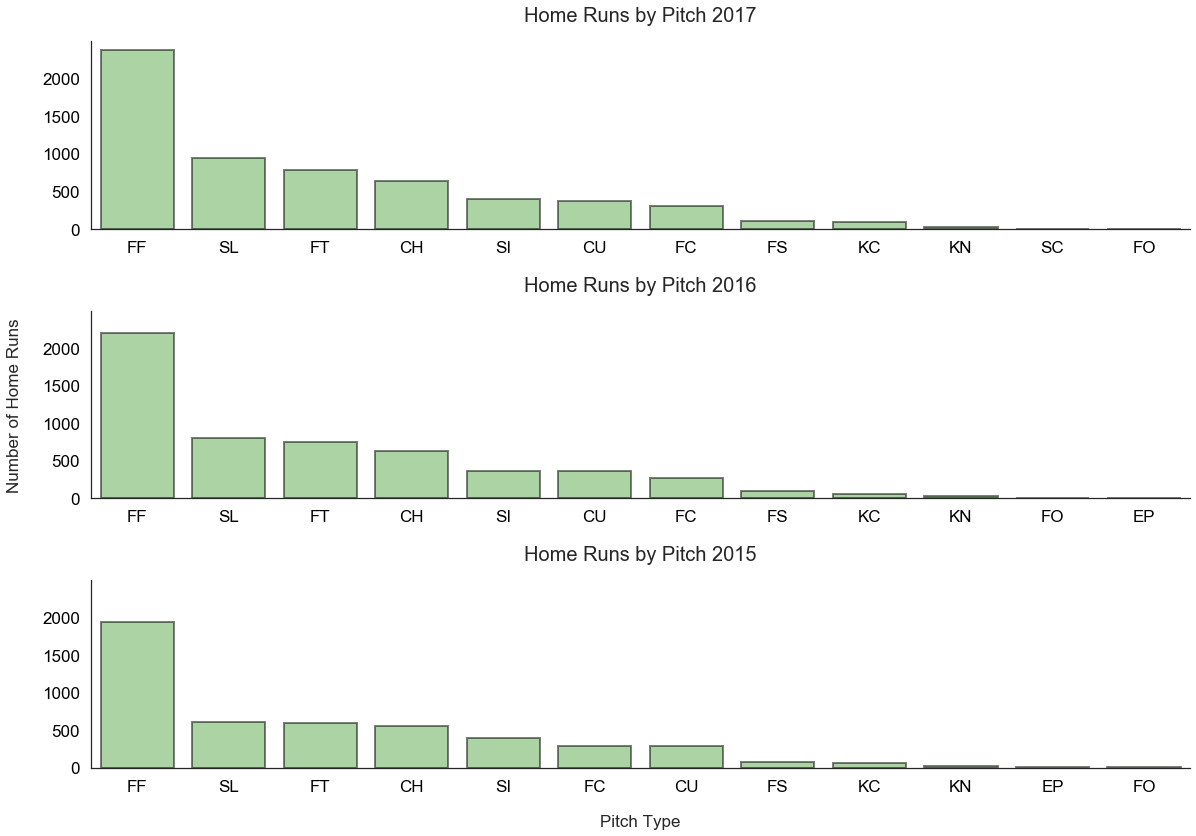

In [42]:
fig, axes = plt.subplots(ncols=1, nrows=3, sharey=True, figsize=(17,12))

sns.despine()
sns.set(style="white", font_scale=2)
sns.set_context("poster", rc={'patch.linewidth':2})

a = sns.barplot(pitch_type_counts17.index, 
                pitch_type_counts17['pitch_type'],
                color='#51b73b', 
                alpha=.5, 
                edgecolor='k',
                ax=axes[0],
                label='Launch Speeds 2017')

b = sns.barplot(pitch_type_counts16.index, 
                pitch_type_counts16['pitch_type'],
                color='#51b73b', 
                alpha=.5, 
                edgecolor='k',
                ax=axes[1],
                label='Launch Speeds 2016')

c = sns.barplot(pitch_type_counts15.index, 
                pitch_type_counts15['pitch_type'],
                color='#51b73b', 
                alpha=.5, 
                edgecolor='k',
                ax=axes[2],
                label='Launch Speeds 2015')

axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_title('Home Runs by Pitch 2017', fontsize=20, pad=20)
axes[1].set_ylabel('Number of Home Runs', fontsize=17, labelpad=20)
axes[1].set_xlabel('')
axes[1].set_title('Home Runs by Pitch 2016', fontsize=20, pad=20)
axes[2].set_ylabel('')
axes[2].set_xlabel('Pitch Type', fontsize=17, labelpad=20)
axes[2].set_title('Home Runs by Pitch 2015', fontsize=20, pad=20)

a.tick_params(labelsize=17,labelcolor="k")
b.tick_params(labelsize=17,labelcolor="k")
c.tick_params(labelsize=17,labelcolor="k")

fig.tight_layout();

#### Home Run totals by Zone

Another area of importance is the zone within the batters box the ball was thrown and then hit for a home run. Let's review the total number of home runs by zone.

##### Interpretation

The below image shows the corresponding zones for the batter that are tracked when a pitch crosses the plate. We can see from the plot that zones 4, 5, and 6 are where batters hit the most home runs and this makes sense as this is in the middle of the batters srike zone.

The most intersting thing about the zones is that the third most home runs are hit in zone 8 which is an area that is linked to Fly Ball hits. This provides further evidence into the claim I made earlier about seeing more Fly Ball launch angles in the distributions for the 2017 season than any other seasons since 2015.

<img src="https://cdn2.vox-cdn.com/assets/4655223/zone.png" style="float: left; margin: 20px; height: 300px">

In [43]:
zone_counts = final_df['zone'].value_counts().to_frame()
zone_counts.reset_index(inplace=True)

In [44]:
zone_counts.columns = ['zones', 'zone_counts']
zone_counts.set_index('zones', inplace=True)

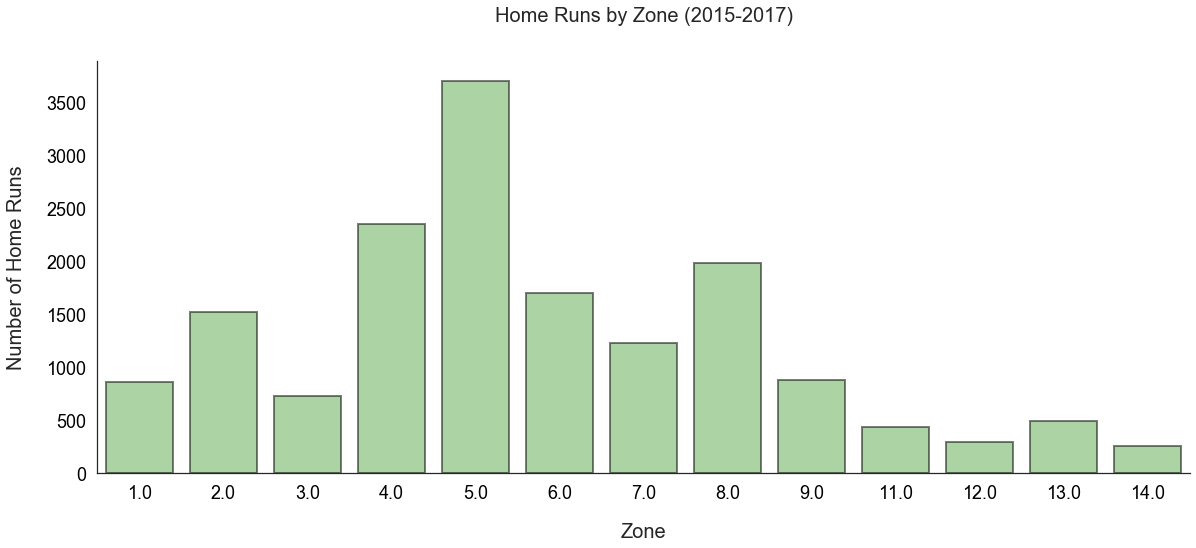

In [45]:
plt.figure(figsize=(17,8))

sns.set(style="white")
sns.set_context("poster", rc={'patch.linewidth':2})

plt.title('Home Runs by Zone (2015-2017)', fontsize=20, pad=40)

a = sns.barplot(zone_counts.index,
                zone_counts['zone_counts'], 
                color='#51b73b', alpha=.5, edgecolor='k')

plt.xlabel('Zone', fontsize=20, labelpad=20)
plt.ylabel('Number of Home Runs', fontsize = 20, labelpad=20)

a.tick_params(labelsize=18,labelcolor="k")
sns.despine()

plt.tight_layout();

plt.savefig('../plots/home_run_totals_zone.png')

#### Home Run Batted Ball Type

The next piece of data I want to examine is related to the type of batted ball that is seen when home runs are hit. There are two types of observations that are recorded when a home run is observed:
1. Fly Ball
2. Line Drive

##### Interpretation

The 2017 baseball season has seen more Fly Ball home runs than the 2015 and 2016 seasons. To be precise the differences between the seasons looks like this:
- Difference 2017 to 2016: 1,317 more Fly Ball home runs hit in 2017 than in 2016
- Difference 2017 to 2015: 2,316 more Fly Ball home runs hit in 2017 than in 2015

I think this stat about Fly Balls hit for home runs is definitely something that I'd like to look into further. There are numerous articles online describing the 2017 season as the year of the "Fly Ball" and I have found an interesting study discussing why this is the case.
    - https://fivethirtyeight.com/features/in-mlbs-new-home-run-era-its-the-baseballs-that-are-juicing/

In [46]:
bb_type_year = final_df.groupby(['game_year', 'bb_type']).count()['pitch_type'].to_frame().reset_index()
bb_type_year

,game_year,bb_type,pitch_type
0,2015,fly_ball,2691
1,2015,line_drive,2123
2,2016,fly_ball,3690
3,2016,line_drive,1847
4,2017,fly_ball,5007
5,2017,line_drive,1023


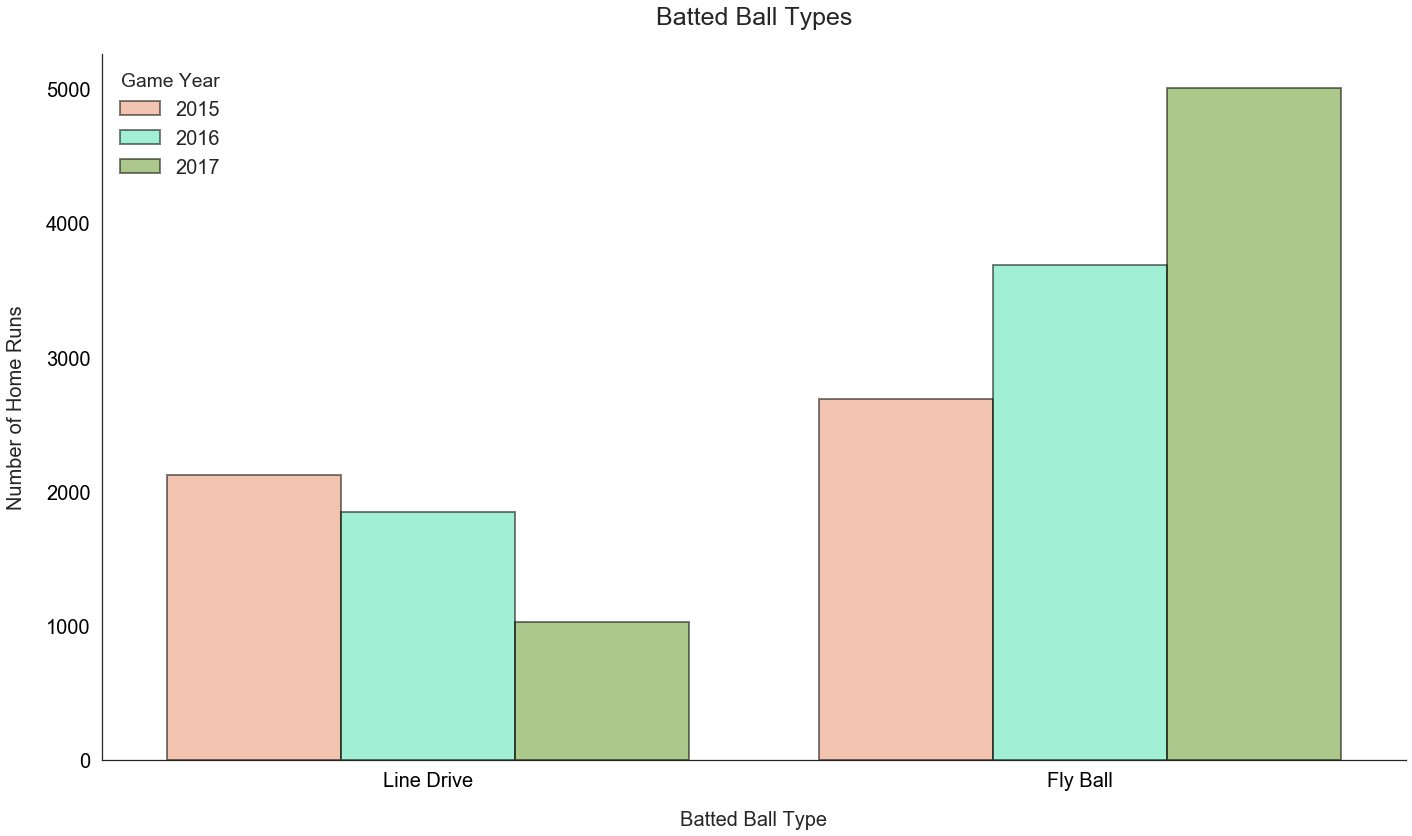

In [47]:
plt.figure(figsize=(20,12))

sns.set(style="white")
sns.set_context("poster", rc={'patch.linewidth':2})
colors = ["orangish", "greenish cyan", "leaf green"]
palette=sns.xkcd_palette(colors)


plt.title('Batted Ball Types', fontsize=25, pad=30)

a = sns.barplot(bb_type_year['bb_type'].replace({'line_drive':'Line Drive', 'fly_ball':'Fly Ball'}), 
                bb_type_year['pitch_type'], 
                hue=bb_type_year['game_year'],
                palette=palette,
                alpha=.5,
                edgecolor='k',
                order=['Line Drive', 'Fly Ball']
               )

plt.xlabel('Batted Ball Type', fontsize=20, labelpad=20)
plt.ylabel('Number of Home Runs', fontsize=20, labelpad=20)
plt.legend(title="Game Year", fontsize=20)


a.tick_params(labelsize=20, labelcolor="k")

sns.despine()

plt.tight_layout();
plt.savefig('../plots/bb_type_by_year.png')

#### Home Runs by Age

Next, lets take a look at the distribution of age and total home runs.

##### Interpretation

The plot is definitely consistent in indicating that when a batter is either 31 or 32 years of age they are hitting more home runs than any other age group. The other thing worth noting is that in the years of 2016 and 2017 the batters who were 26 to 28 years of age were hitting more home runs than that same age group in 2015.

A take away from this is that younger batters were a huge part of why the 2017 season had a record breaking season of home runs hit.

In [48]:
age_df = final_df.groupby(['age', 'game_year']).agg({'pitch_type':'count', 'launch_speed':'mean'})
age_df.reset_index(inplace=True)
age_df.set_index('age', inplace=True)

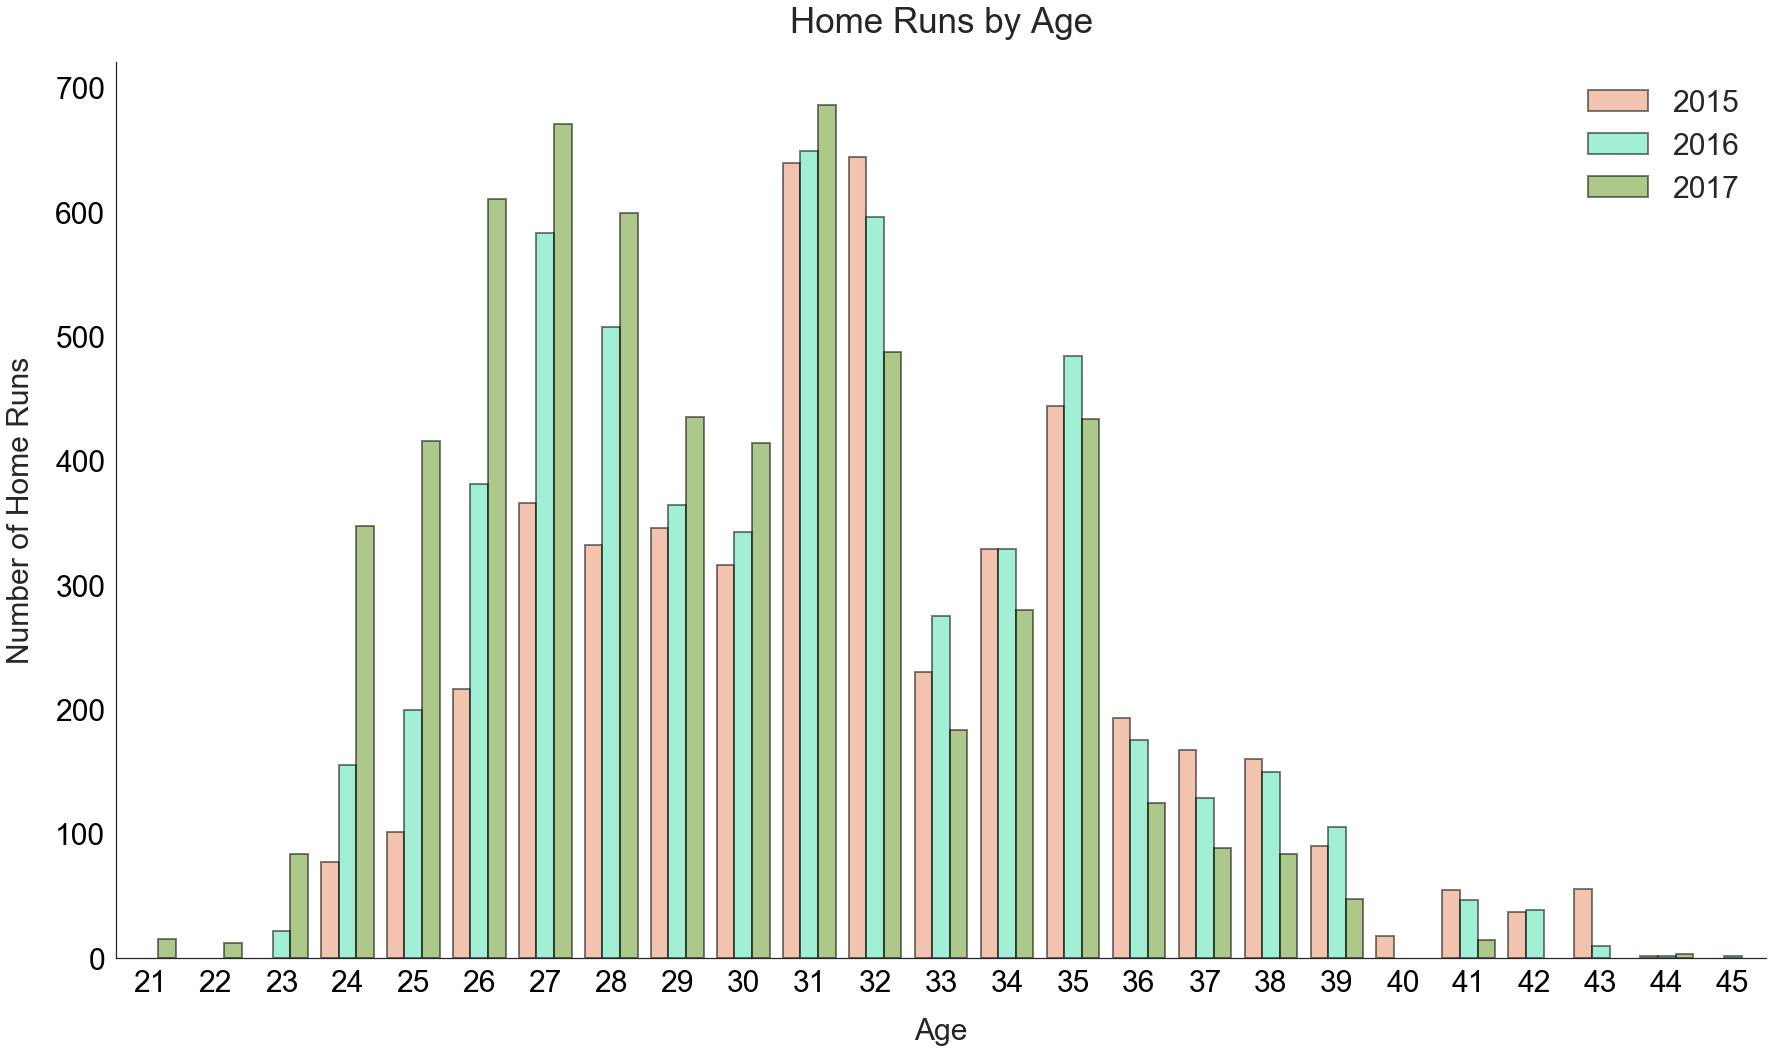

In [49]:
plt.figure(figsize=(25,15))

sns.set(style="white")
sns.set_context("poster", rc={'patch.linewidth':2})
colors = ["orangish", "greenish cyan", "leaf green"]
palette=sns.xkcd_palette(colors)

plt.title('Home Runs by Age', fontsize=35, pad=30)

a = sns.barplot(age_df.index, 
                age_df['pitch_type'],
                hue=age_df['game_year'],
                palette=palette,
                alpha=.5,
                edgecolor='k'
               )

plt.xlabel('Age', fontsize=30, labelpad=20)
plt.ylabel('Number of Home Runs', fontsize=30, labelpad=20)

a.tick_params(labelsize=30, labelcolor="k")
plt.legend(loc=1, fontsize=30)

sns.despine()

plt.tight_layout();
plt.savefig('../plots/home_runs_age.png')

### Save the Final Data Frame

In [50]:
final_df.to_csv('../data/final_for_preprocessing.csv', )

##### Now that we have explored the data lets move on to preprocessing : 03-PreProcessing